# Task_1 :  SMS classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Data preprocessing

In [3]:
#dropping unwanted columns
unwanted_cols=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=unwanted_cols, inplace=True)

In [4]:
df.shape

(5572, 2)

In [5]:
df.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)

In [6]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0, 0.5, 'Number of Data points')

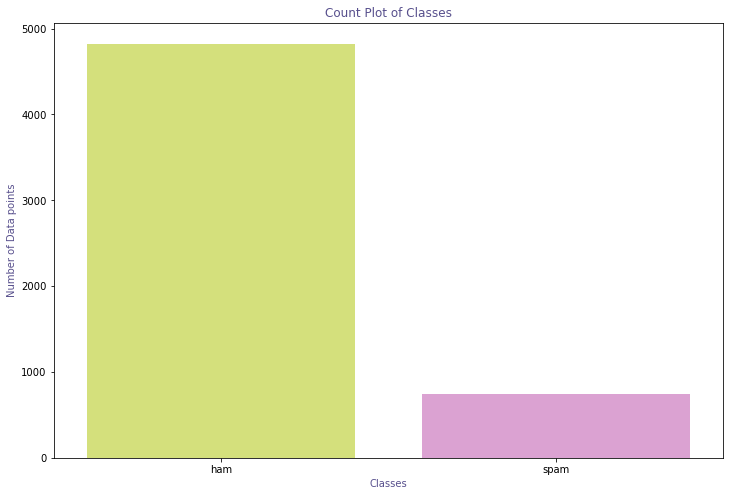

In [8]:
#Palette
cols= ["#E1F16B", "#E598D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["target"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

In [9]:
def target_mapper(text):
    return 0 if text=='spam' else 1

df["target"]=df['target'].apply(func=target_mapper)

In [10]:
def charactersAlone(x):
    x = re.sub(r"[^a-zA-Z+']", ' ', x)
    return x
df['processed_msg'] = df['message'].apply(charactersAlone)
df.head()

,target,message,processed_msg
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only ...
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I don't think he goes to usf he lives aro...


In [11]:
import string
string.punctuation
def avoidPunctuation(x):
    x = "".join([i for i in x if i not in string.punctuation])
    return x
df['processed_msg'] = df['processed_msg'].apply(avoidPunctuation)
df.head()

,target,message,processed_msg
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only ...
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives arou...


In [12]:
df['processed_msg'] = df['processed_msg'].str.lower()

In [13]:
df.head()

,target,message,processed_msg
0,1,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...
3,1,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives arou...


In [14]:
#TOKENIZATION
from nltk.tokenize import word_tokenize


nltk.download('punkt')


df['processed_msg']= df['processed_msg'].apply(lambda x: str(x)) 
df['processed_msg'] = df['processed_msg'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
#REMOVAL OF STOPWORDS
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))  
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Apply the function to each row in the 'tokens' column
df['processed_msg'] = df['processed_msg'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.head()

,target,message,processed_msg
0,1,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,1,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [17]:
#STEMMING
from nltk.stem import LancasterStemmer
def perform_stemming(tokens):
    stemmer = LancasterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Apply stemming to the 'filtered_tokens' column
df['processed_msg'] = df['processed_msg'].apply(perform_stemming)

In [18]:
df.head()

,target,message,processed_msg
0,1,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, avail, bug, n, gre,..."
1,1,Ok lar... Joking wif u oni...,"[ok, lar, jok, wif, u, on]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,"[fre, entry, wkly, comp, win, fa, cup, fin, tk..."
3,1,U dun say so early hor... U c already then say...,"[u, dun, say, ear, hor, u, c, already, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, liv, around, though]"


In [19]:
#LEMMATIZATION
lem = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [lem.lemmatize(word) for word in tokenized_text]
    text=' '.join(text)
    return text
df['lemmatized'] = df['processed_msg'].apply(lambda x : lemmatizing(x))
df.head()

,target,message,processed_msg,lemmatized
0,1,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, avail, bug, n, gre,...",go jurong point crazy avail bug n gre world la...
1,1,Ok lar... Joking wif u oni...,"[ok, lar, jok, wif, u, on]",ok lar jok wif u on
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,"[fre, entry, wkly, comp, win, fa, cup, fin, tk...",fre entry wkly comp win fa cup fin tkts st may...
3,1,U dun say so early hor... U c already then say...,"[u, dun, say, ear, hor, u, c, already, say]",u dun say ear hor u c already say
4,1,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, liv, around, though]",nah dont think goe usf liv around though


In [20]:
#TF-IDF VECTORIZATION
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
x = tfidf_vectorizer.fit_transform(df['lemmatized'])


In [21]:
y=df['target']

In [22]:
y.value_counts()

1    4825
0     747
Name: target, dtype: int64

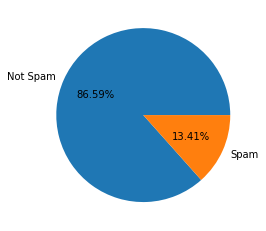

In [23]:
#check the distribution of target variable using Pie chart
plt.pie(y.value_counts().values,labels=["Not Spam","Spam"],autopct="%0.2f%%")
plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4457, 5548), (4457,), (1115, 5548), (1115,))

SVM CLASSIFIER

In [25]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [26]:
# Make predictions on the test set
svm_predictions = svm_classifier.predict(x_test)

# Evaluate accuracy and other metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy: ", svm_accuracy)
print(classification_report(y_test, svm_predictions))

SVM Accuracy:  0.9757847533632287
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       150
           1       0.97      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [27]:
df['predicted']=svm_classifier.predict(x)

In [28]:
df

,target,message,processed_msg,lemmatized,predicted
0,1,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, avail, bug, n, gre,...",go jurong point crazy avail bug n gre world la...,1
1,1,Ok lar... Joking wif u oni...,"[ok, lar, jok, wif, u, on]",ok lar jok wif u on,1
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,"[fre, entry, wkly, comp, win, fa, cup, fin, tk...",fre entry wkly comp win fa cup fin tkts st may...,0
3,1,U dun say so early hor... U c already then say...,"[u, dun, say, ear, hor, u, c, already, say]",u dun say ear hor u c already say,1
4,1,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, liv, around, though]",nah dont think goe usf liv around though,1
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,"[nd, tim, tri, contact, u, u, pound, priz, cla...",nd tim tri contact u u pound priz claim easy c...,0
5568,1,Will Ì_ b going to esplanade fr home?,"[b, going, esplanad, fr, hom]",b going esplanad fr hom,1
5569,1,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggest]",pity mood suggest,1
5570,1,The guy did some bitching but I acted like i'd...,"[guy, bitch, act, lik, id, interest, buy, some...",guy bitch act lik id interest buy someth el ne...,1
